## Data Analysis Challenge

The data is available as two attached CSV files:     
takehome_user_engagement.csv    
takehome_users.csv    

1] A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years.    This table includes:        
● name: the user's name      
● object_id: the user's id       
● email: email address       
● creation_source: how their account was created. This takes on one
of 5 values:          
○ PERSONAL_PROJECTS: invited to join another user's personal workspace     
○ GUEST_INVITE: invited to an organization as a guest (limited permissions)      
○ ORG_INVITE: invited to an organization (as a full member)      
○ SIGNUP: signed up via the website      
○ SIGNUP_GOOGLE_AUTH: signed up using Google       
Authentication (using a Google email account for their login
id)      
● creation_time: when they created their account       
● last_session_creation_time: unix timestamp of last login      
● opted_in_to_mailing_list: whether they have opted into receiving
marketing emails       
● enabled_for_marketing_drip: whether they are on the regular
marketing email drip       
● org_id: the organization (group of users) they belong to     
● invited_by_user_id: which user invited them to join (if applicable).       

2] A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption.

Question:       
We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better ­­ no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
#import user data
users_df = pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")
usage_df = pd.read_csv('takehome_user_engagement.csv',encoding="ISO-8859-1")

In [3]:
users_df.tail(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN


In [4]:
users_df.creation_time = pd.to_datetime(users_df.creation_time)
users_df.last_session_creation_time = pd.to_datetime(users_df.last_session_creation_time)

Text(0.5, 1.0, 'User Signups by Year')

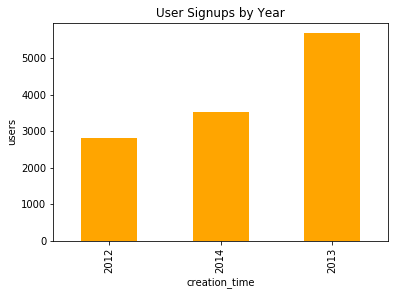

In [5]:
# number of users signed up by creation year
users_df.groupby(users_df['creation_time'].dt.year).size().sort_values().plot(kind='bar',color='orange')
plt.ylabel('users')
plt.title('User Signups by Year')

Text(0.5, 1.0, 'Users opted in to mailing list')

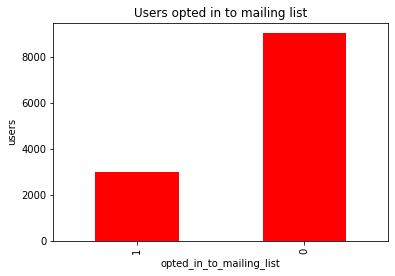

In [6]:
users_df.groupby(users_df['opted_in_to_mailing_list']).size().sort_values().plot(kind='bar',color='r')
plt.ylabel('users')
plt.title('Users opted in to mailing list')

Text(0.5, 1.0, 'Users enabled for marketing drip')

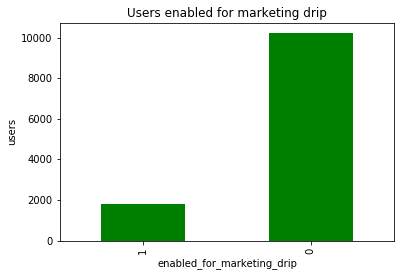

In [7]:
users_df.groupby(users_df['enabled_for_marketing_drip']).size().sort_values().plot(kind='bar',color='g')
plt.ylabel('users')
plt.title('Users enabled for marketing drip')

Text(0.5, 1.0, 'Users by Creation Source')

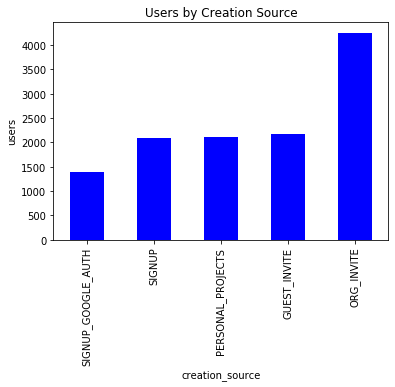

In [8]:
users_df.groupby(users_df['creation_source']).size().sort_values().plot(kind='bar',color='b')
plt.ylabel('users')
plt.title('Users by Creation Source')

In [9]:
users_df.shape

(12000, 10)

In [10]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


We see lots of rows missing data for last_session_creation_time and invited_by_user_id. I feel deleting these large number of rows from the data would not be wise and also we are not aware of any values that could replace the null entries. So let us proceed without making any changes.

In [11]:
usage_df.tail(2)

,time_stamp,user_id,visited
207915,2012-06-02 11:55:59,11999,1
207916,2014-01-26 08:57:12,12000,1


In [12]:
usage_df.time_stamp = pd.to_datetime(usage_df.time_stamp)

In [13]:
# Create a column for year_week
usage_df['year_week'] = usage_df['time_stamp'].dt.strftime('%Y-%U')

In [14]:
counts = usage_df.groupby(['user_id', 'year_week']).size().reset_index().rename(columns={0:'count'})
counts['count'].max()

7

In [15]:
adopted_users = counts.loc[counts['count'] >= 3].user_id.unique()
print('Total Number of Adopted Users: {}'.format(len(adopted_users)))
print('Percentage of Adopted Users: {:.2f}%'.format(len(adopted_users)*100/users_df.shape[0]))

Total Number of Adopted Users: 1432
Percentage of Adopted Users: 11.93%


In [16]:
# create a column to indicate if the user is an adopted user or not
users_df['adopted_user'] = (users_df['object_id'].isin(adopted_users))
users_df.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,False


Text(0.5, 1.0, 'Adopted Users')

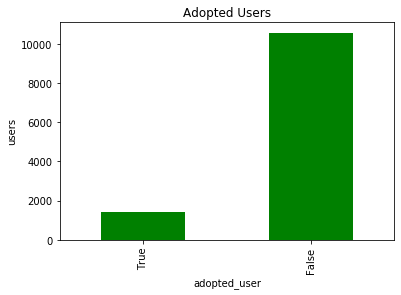

In [17]:
users_df.groupby(users_df['adopted_user']).size().sort_values().plot(kind='bar',color='g')
plt.ylabel('users')
plt.title('Adopted Users')

In [18]:
users_df.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

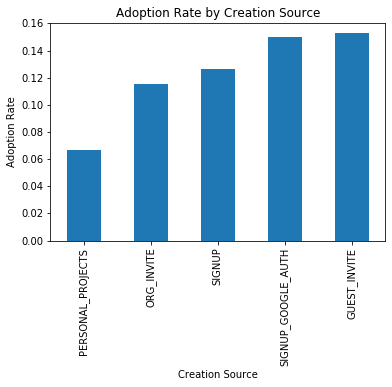

In [19]:
users_df.groupby('creation_source')['adopted_user'].mean().sort_values(0).plot(kind='bar')
plt.xlabel('Creation Source')
plt.ylabel('Adoption Rate')
plt.title('Adoption Rate by Creation Source')
plt.show()

In [20]:
users_df.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,False


In [21]:
usage_agg_df = usage_df.groupby(['user_id'])['user_id','time_stamp'].max()

In [22]:
usage_agg_df.head(2)

,user_id,time_stamp
user_id,,
1,1,2014-04-22 03:53:30
2,2,2014-03-31 03:45:04


In [23]:
usage_agg_df.columns

Index(['user_id', 'time_stamp'], dtype='object')

In [24]:
users_df_mod = result = pd.concat([users_df, usage_agg_df], axis=1).reindex(users_df.index)

In [25]:
users_df_mod.shape

(12000, 13)

In [26]:
from datetime import datetime
proba = []
 
for index, row in users_df_mod.iterrows():
    try:
        proba.append((datetime.strptime(row['time_stamp'].strftime("%Y-%m-%d"), "%Y-%m-%d").date() 
                                 - datetime.strptime(row['creation_time'].strftime("%Y-%m-%d"), "%Y-%m-%d").date()).days)
    except ValueError:
        proba.append(0)
users_df_mod['days_since_signup'] = proba

In [27]:
len(users_df_mod[users_df_mod['days_since_signup']>0]['days_since_signup'])

5221

In [28]:
users_df_mod.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted_user', 'user_id', 'time_stamp', 'days_since_signup'],
      dtype='object')

In [29]:
users_df_mod.adopted_user.value_counts()

False    10568
True      1432
Name: adopted_user, dtype: int64

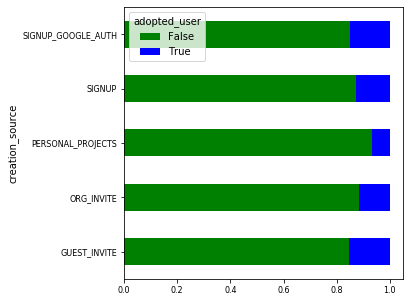

In [30]:
users_df_mod.groupby(['creation_source'])['adopted_user'].value_counts(normalize=True).unstack().\
            plot.barh(figsize=(5,5),width=0.5,color=['g', 'b'],fontsize=8,stacked=True)

In [31]:
users_df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
object_id                     12000 non-null float64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null float64
enabled_for_marketing_drip    12000 non-null float64
org_id                        12000 non-null float64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null object
user_id                       8822 non-null float64
time_stamp                    8822 non-null datetime64[ns]
days_since_signup             12000 non-null int64
dtypes: datetime64[ns](3), float64(6), int64(1), object(4)
memory usage: 1.3+ MB


In [32]:
# replace all negative values of days since sign up to 0 as they represent invalid data
# creation time > last session creation time by that user
users_df_mod.loc[(users_df_mod.days_since_signup < 0),'days_since_signup']=0

In [33]:
users_df_mod.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,user_id,time_stamp,days_since_signup
0,1.0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1.0,0.0,11.0,10803.0,False,NaN,NaT,0
1,2.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0.0,0.0,1.0,316.0,False,1.0,2014-04-22 03:53:30,158
2,3.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0.0,0.0,94.0,1525.0,False,2.0,2014-03-31 03:45:04,377
3,4.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0.0,0.0,1.0,5151.0,False,3.0,2013-03-19 23:14:52,0
4,5.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0.0,0.0,193.0,5240.0,False,4.0,2013-05-22 08:09:28,125


In [34]:
# use pd.concat to join the new columns with your original dataframe
users_df_mod = pd.concat([users_df_mod,pd.get_dummies(users_df_mod['creation_source'], prefix='creation_source')],axis=1)

In [35]:
users_df_mod.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted_user', 'user_id', 'time_stamp', 'days_since_signup',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [36]:
neworder = ['object_id', 'creation_time', 'name', 'email','creation_source',
       'last_session_creation_time','user_id', 'time_stamp','opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id','days_since_signup',
            'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH','adopted_user']

In [37]:
users_df_mod = users_df_mod.reindex(columns = neworder)

In [38]:
users_df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 19 columns):
object_id                             12000 non-null float64
creation_time                         12000 non-null datetime64[ns]
name                                  12000 non-null object
email                                 12000 non-null object
creation_source                       12000 non-null object
last_session_creation_time            8823 non-null datetime64[ns]
user_id                               8822 non-null float64
time_stamp                            8822 non-null datetime64[ns]
opted_in_to_mailing_list              12000 non-null float64
enabled_for_marketing_drip            12000 non-null float64
org_id                                12000 non-null float64
invited_by_user_id                    6417 non-null float64
days_since_signup                     12000 non-null int64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE 

In [39]:
users_df_mod['invited_by_user_id'] = users_df_mod.invited_by_user_id.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')

In [40]:
# selecting all features to compute importance
features = users_df_mod.columns[8:19]

In [41]:
df_features = users_df_mod.filter(features, axis=1)
df_features.head(2)

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,days_since_signup,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,adopted_user
0,1.0,0.0,11.0,10803,0,1,0,0,0,0,False
1,0.0,0.0,1.0,316,158,0,1,0,0,0,False


In [42]:
#convert columns to float64
for col in features:
    df_features[col] = df_features[col].astype('float64')
df_features.head(2)

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,days_since_signup,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,adopted_user
0,1.0,0.0,11.0,10803.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,316.0,158.0,0.0,1.0,0.0,0.0,0.0,0.0


In [43]:
df_features.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'days_since_signup',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'adopted_user'],
      dtype='object')

Feature Importance:

1. org_id (0.466049)
2. days_since_signup (0.261798)
3. invited_by_user_id (0.237078)
4. opted_in_to_mailing_list (0.012286)
5. enabled_for_marketing_drip (0.010601)
6. creation_source_PERSONAL_PROJECTS (0.005148)
7. creation_source_GUEST_INVITE (0.002545)
8. creation_source_SIGNUP_GOOGLE_AUTH (0.001656)
9. creation_source_ORG_INVITE (0.001513)
10. creation_source_SIGNUP (0.001326)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

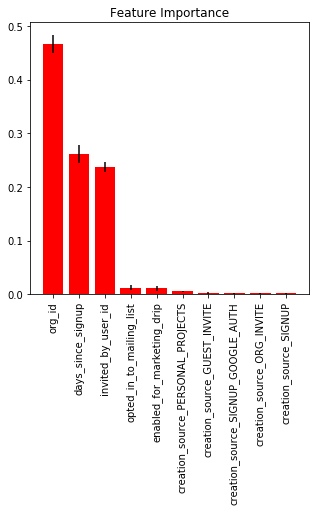

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier
# imputing missing values with 0 using SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
# selecting all features to compute importance
features = df_features.columns[0:10]
X_train = df_features[features]
# selecting target variable
y_train = df_features.loc[:,'adopted_user']

# Build a model to compute feature importance
model = ExtraTreesClassifier(n_estimators=250, random_state=0)
model.fit(imp_mean.fit_transform(X_train), y_train)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
ind = np.argsort(importances)[::-1]
features = [X_train.columns[index] for index in ind]

# Print feature importance
print("Feature Importance:\n")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[ind[f]], importances[ind[f]]))

# Plot the feature importance
plt.figure(figsize=(5,5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[ind],color="r", yerr=std[ind])
plt.xticks(range(X_train.shape[1]), features)
plt.xticks(rotation=90)

#### Question:
We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better ­­ no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.


#### Answer:
From the data set we see that 1432 users are adopted users and 10568 users are not adopted users out of 12000 users. Adopted users comprise of 11.93% of the total users.
Upon calculating the number of days between user's creation time and last login time, there were several negative days which were were changed to 0 considering it invalid.
From the plot above it is clear that the top features in predicting future user adoption are,    
1. org_id - organization the user belongs to (0.466049)   
2. days_since_signup - days since signup (0.261798)   
3. invited_by_user_id - invited by other users (0.237078)         
while other features show less importance in predicting future user adoption.